# 🎵 A música molda momentos e marca experiências  
**🎵 Music shapes moments and marks experiences**


## 1. 🎶 Parte do nosso dia a dia  
**🎶 Part of our daily lives**


A música nos acompanha. Seja qual for o ritmo, estilo ou época:  
**Music is always with us, regardless of rhythm, style or era:**

- 🎷 Bossa Nova  
- 🎸 Jovem Guarda  
- 🎧 Funk


## 2. 🤔 E se eu mostrasse só a letra da música? Será que você conseguiria identificar o gênero?  
**🤔 What if I showed only the lyrics?** **Would you be able to guess the genre?**





#### 🎤 Letra | Lyrics

> Quando eu estou aqui  
> Eu vivo esse momento lindo  
> Olhando pra você  
> E as mesmas emoções sentindo  
>   
> São tantas já vividas  
> São momentos que eu não esqueci  
> Detalhes de uma vida  
> Histórias que eu contei aqui  
>   
> Amigos eu ganhei  
> Saudades eu senti, partindo  
> E às vezes eu deixei  
> Você me ver chorar, sorrindo  



##### 🧩 Gênero revelado | Genre revealed

**Emoções** — *Roberto Carlos*  
🟢 Gênero | Genre: **Jovem Guarda**

## 3. 🔍 Mas como os gêneros se diferenciam?  
**🔍 But how do genres differ?**


### Características principais | Main characteristics:

- 🎼 **Instrumentação** | Instrumentation  
- ⏱️ **Ritmo** | Rhythm  
- ✍️ **Linguagem** | Lyrics / Language

**Nesse exemplo prático, focaremos na parte de linguagem.**

In this practical example, we will focus on the language aspect.

---

Gráfico gerado a partir de dados de músicas brasileiras.

**Graph generated from Brazilian music data.**

---

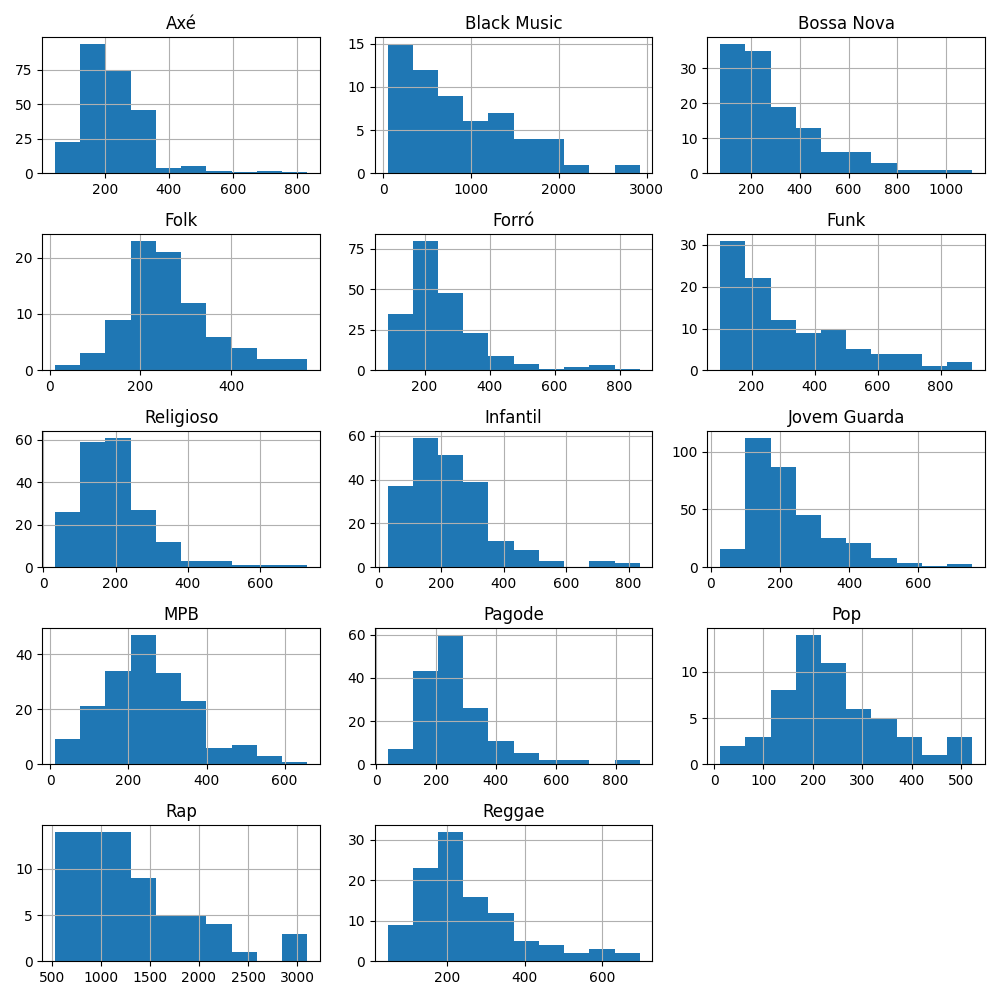


- Eixo-X = palavras distintas | Eixo-Y = quantidade de músicas
- X-axis = distinct words | Y-axis = number of songs with this characteristic

## 4. 📊 Olhando pelas letras...  
**📊 Looking at the lyrics...**



- 🎤 O **Rap** costuma ter **muitas palavras** e **rimas complexas**.  
  
  **Rap** tends to have **lots of words** and **complex rhymes**.

- 🟡 O **Reggae**, por outro lado, mostra uma concentração **muito menor**.
  
  **Reggae**, on the other hand, shows a much **smaller concentration**

- 🥁 Agora compare o **Pagode** com a **Jovem Guarda**... Só olhando os dados, não é tão fácil **diferenciá-los**.  
  
  Now compare **Pagode** with **Jovem Guarda**... Just by looking at the data, it’s not that easy to **tell them apart**.

## 5. 🤖 E a Inteligência Artificial?  
**🤖 What about Artificial Intelligence?**

Com base nos padrões de vocabulário, estrutura e estilo… será que ela acertaria?

**Based on the patterns of vocabulary, structure, and style… would she get it right?**




# Prática / Practice

Classificação de Músicas | Songs Classification

### 📦 Dependências / Dependencies

- ✅ **Criar conta no Hugging Face (Create an account on Hugging Face)**
  🔗 https://huggingface.co/join

- ✅ **Gerar um token de autenticação (Generate an authentication token)**  
  🔗 https://huggingface.co/settings/tokens  
  *(O token será usado para autenticação nas APIs do Hugging Face.)*  
  *(The token is used to authenticate with Hugging Face APIs.)*

---

#### 🔐 Uso do token / Token usage

Você pode usar o token de duas formas:  
You can use the token in two ways:

**1. Definindo como variável de ambiente no código**  

**1. Setting it as an environment variable in the code**

```python
import os
os.environ['HF_TOKEN'] = '<token>'
```

**2. Salvando em um arquivo .env (usado neste projeto)**

**2. Saving it in a .env file (used in this project)**

No arquivo .env, adicione:

In the .env file, add:

```dotenv
HF_TOKEN=<token>
```

E carregue com o dotenv:

Then load it using dotenv:

```python
from dotenv import load_dotenv
load_dotenv(dotenv_path="drive/MyDrive/Colab Notebooks/hugging_face_token/.env")
```

**Nota**: O caminho usado nesse exemplo, é o mesmo caminho utilizado para salvar o arquivo .env nesse notebook.

**Note**: The path used in this example is the same path used to save the .env file in this notebook.

### 📥 Dataset

Baixe o dataset:

Download the dataset:

🔗 https://github.com/joaoflauzino/music_style_classification/blob/main/output/songs.csv

**1. Faça upload do arquivo no Google Drive.**

**1. Upload the file to your Google Drive.**

Neste exemplo, o caminho usado foi:

In this example, the path used is:

**"drive/MyDrive/Colab Notebooks/dataset/output/songs.csv"**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install python_dotenv

In [3]:
from dotenv import load_dotenv

base_path = "drive/MyDrive/Colab Notebooks"
load_dotenv(dotenv_path=f"{base_path}/hugging_face_token/.env")

True

### Pacotes / Packages

In [ ]:
import re

import pandas as pd
from huggingface_hub import InferenceClient

### Dados / Data

In [5]:
dataframe = pd.read_csv(f"{base_path}/dataset/output/songs.csv", sep=";")
dataframe[dataframe.columns[1:]].head(5)

,singer,singer_link,category,category_link,music_name,music_link,lyrics,is_pt,transformed,transformed_without_tags,reduce,len
0,Alexandre Peixe,/alexandre-peixe/,Axé,/browse/style/axe.html,Minas Não Tem Mar,/alexandre-peixe/minas-nao-tem-mar.html,"<div data-plugin=""googleTranslate"" id=""lyrics""...",NaN,dirigir beba beber chame irmao saia rotina cai...,"Se dirigir, não beba! Mas se for beber, me cha...",dirigir beba beber chame irmao saia rotina cai...,269
1,Alexandre Peixe,/alexandre-peixe/,Axé,/browse/style/axe.html,Chegou Ao Fim,/alexandre-peixe/chegou-ao-fim.html,"<div data-plugin=""googleTranslate"" id=""lyrics""...",NaN,andei pensando espelho deixar manda deixar lag...,Eu andei pensando em nós dois Já não sei quem ...,andei pensando espelho deixar manda lagrima ol...,174
2,Alexandre Peixe,/alexandre-peixe/,Axé,/browse/style/axe.html,Tô Na Pista,/alexandre-peixe/to-na-pista.html,"<div data-plugin=""googleTranslate"" id=""lyrics""...",NaN,uo uo uoo uoooo hoje night promete to madrugad...,"Uô, uô, uôo, uôooo Hoje nossa night promete T...",uo uoo uoooo hoje night promete to madrugada p...,194
3,Alexandre Peixe,/alexandre-peixe/,Axé,/browse/style/axe.html,Eu Sou Mais Você,/alexandre-peixe/eu-sou-mais-voce.html,"<div data-plugin=""googleTranslate"" id=""lyrics""...",NaN,ficar tentando sai cabeca escutar entender dei...,Eu sou mais você Não quero ficar tentando diz...,ficar tentando sai cabeca escutar entender dei...,208
4,Alexandre Peixe,/alexandre-peixe/,Axé,/browse/style/axe.html,Lembra da Gente,/alexandre-peixe/lembra-da-gente.html,"<div data-plugin=""googleTranslate"" id=""lyrics""...",NaN,esquecer mudou balancou invadiu vida facil pen...,"Como posso esquecer Se você me mudou Balançou,...",esquecer mudou balancou invadiu vida facil pen...,290


In [6]:
print(f"Quantidade de gêneros: {dataframe['category'].nunique()}")

Quantidade de gêneros: 14


<Axes: ylabel='category'>

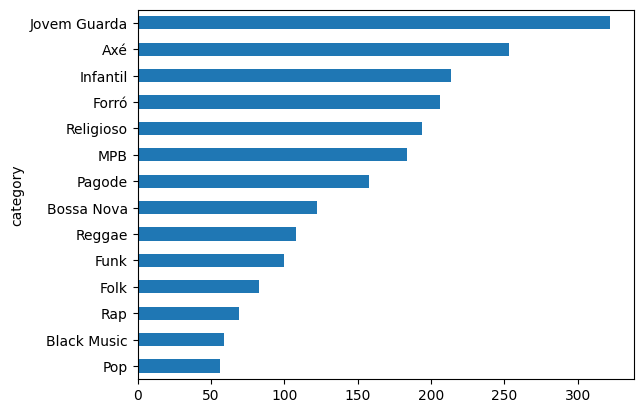

In [7]:
dataframe["category"].value_counts().sort_values(ascending=True).plot.barh()

### Modelo / Model

In [8]:
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

In [9]:
client = InferenceClient(model_id, provider="novita")

### Few shot prompting

Few-shot prompting é uma técnica onde se fornecem **alguns exemplos de entrada** e **saída** diretamente no prompt para ajudar o modelo a entender o que deve fazer. O modelo usa esses exemplos para identificar o padrão e aplicar a lógica em uma nova tarefa semelhante.

Few-shot prompting is a technique where you provide **a few input-output examples** directly in the prompt to help the model understand the task. The model uses those examples to identify the pattern and apply it to a new, similar input

### Coletando músicas de exemplo por categoria / Taking music examples by category

In [10]:
def read_categories_examples(path: str = f"{base_path}/dataset/output/songs.csv") -> str:
    songs = pd.read_csv(path, sep=";")
    categories = songs['category'].unique().tolist()
    examples = ""
    for idx, cat in enumerate(categories):
        example = songs[songs['category'] == cat].sample(1).iloc[0]['transformed']
        examples += f"Song {idx} \n -category: {cat} \n -lyric: {example[:300]}\n\n"
    return examples

In [11]:
# Capturando um exemplo por categoria
# Capturing one example per category
train_examples = read_categories_examples()

prompt_sistema = (
    "Você é um especialista em música brasileira. \n"
    "Sua tarefa é identificar o gênero musical de letras de músicas. \n"
    "Você receberá exemplos contendo a letra da música (lyric) e o gênero correto (category)"
    "Sempre retorne **apenas UM gênero** por letra.\n\n"
    "Exemplos:\n"
    f"{train_examples}"
)

In [12]:
print(prompt_sistema)

Você é um especialista em música brasileira. 
Sua tarefa é identificar o gênero musical de letras de músicas. 
Você receberá exemplos contendo a letra da música (lyric) e o gênero correto (category)Sempre retorne **apenas UM gênero** por letra.

Exemplos:
Song 0 
 -category: Axé 
 -lyric: medo voz ovido medo boca abrigo medo insinuacoes viro fogo arde cama vicio vicio estacoes amor chuva correndo demora amor chuva passou comigo queria queria queria medo insinuacoes viro fogo arde cama vicio vicio estacoes

Song 1 
 -category: Black Music 
 -lyric: tire construcoes praia consigo respirar meninas mini saia conseguem respirar especulacao imobiliaria petroleo alto mar subiu predio ouco vaia figa vida sofrida terminar sucedida luz sol amiga luz lua instiga diga diga sara ferida diga diga lucro maquina louco lucro maquina louco tire construcoes pra

Song 2 
 -category: Bossa Nova 
 -lyric: voltar or chora volto ficar or chora hora deixar amor ficar quis ficar ti conduzia rei coroado queria a

In [13]:
def get_examples_to_classify(path: str = f"{base_path}/dataset/output/songs.csv") -> tuple[dict, dict]:
    songs = pd.read_csv(path, sep=";")
    categories = songs['category'].unique().tolist()
    test_examples = {}
    labels = {}
    for idx, cat in enumerate(categories):
        row = songs[songs['category'] == cat].sample(1).iloc[0]
        lyric = row['transformed'][:300]
        test_examples[f"Song {idx}"] = lyric
        labels[f"Song {idx}"] = cat
    return test_examples, labels

In [14]:
# Capturando um exemplo por categoria
# Capturing one example per category
test_examples, test_labels = get_examples_to_classify()

prompt_usuario = f"""
  Você deve escolher **apenas UM** gênero musical que melhor representa **cada** letra.\n
  Você tem essas opções: Axé, Black Music, Bossa Nova, Folk, Forró, Funk,
      Religioso, Infantil, Jovem Guarda, MPB, Pagode, Pop,
      Rap, Reggae \n

  Responda exatamente no seguinte formato (sem explicações ou variações): \n
  Song X: gênero \n\n

  Exemplo: \n
  Song 0: Pagode \n
  Song 1: MPB \n
  ... \n

  Agora classifique as seguintes letras:\n
  {test_examples}
        """

In [15]:
print(prompt_usuario)


  Você deve escolher **apenas UM** gênero musical que melhor representa **cada** letra.

  Você tem essas opções: Axé, Black Music, Bossa Nova, Folk, Forró, Funk,
      Religioso, Infantil, Jovem Guarda, MPB, Pagode, Pop,
      Rap, Reggae 


  Responda exatamente no seguinte formato (sem explicações ou variações): 

  Song X: gênero 



  Exemplo: 

  Song 0: Pagode 

  Song 1: MPB 

  ... 


  Agora classifique as seguintes letras:

  {'Song 0': 'cai prender diga amor pena pena fiz amor pena passo beijo vive dizendo mina sai hoje mulher meninax gatinha conquistar to passou hora pena amor cai forax terere terereterere terere terereterere terere terereterere cai forax prender diga amor pena pena fiz amor pena passo beijo vive dizendo mina sai ', 'Song 1': 'som sirene lembrar dia instinto quis fiz muita gente chorar muita gente gritando volta revolta pedindo justica divina familia dizendo homens farda levam carro possante milhares chegam destino instante abrem porta tiram levam outro f

### Construindo a requisição / Building the request

In [16]:
messages = [
        {
            "role": "system",
            "content": prompt_sistema
        },
        {
            "role": "user",
            "content": prompt_usuario
        }
]

response = client.chat.completions.create(
        messages=messages,
        temperature=0
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Avaliando respostas / Evaluating responses

In [17]:
def parse_llm_response(response_text: str) -> dict:
    predictions = {}
    for line in response_text.strip().split("\n"):
        match = re.match(r"Song (\d+):\s*(.+)", line.strip())
        if match:
            song_id = f"Song {match.group(1)}"
            predicted_genre = match.group(2).strip()
            predictions[song_id] = predicted_genre
    return predictions

In [18]:
llm_output = response.choices[0].message.content

predictions = parse_llm_response(llm_output)

print("\nComparação LLM x Categoria Real: \n")
correct = 0
total = len(test_labels)

for song_id, true_label in test_labels.items():
    pred_label = predictions.get(song_id, "N/A")
    status = "✅" if pred_label.lower() == true_label.lower() else "❌"
    print(f"{song_id}: Predito = {pred_label}, Real = {true_label} {status}")
    if status == "✅":
        correct += 1

print(f"\nAcurácia: {correct}/{total} = {correct / total:.2%}")


Comparação LLM x Categoria Real: 

Song 0: Predito = Forró, Real = Axé ❌
Song 1: Predito = MPB, Real = Black Music ❌
Song 2: Predito = Folk, Real = Bossa Nova ❌
Song 3: Predito = MPB, Real = Folk ❌
Song 4: Predito = Forró, Real = Forró ✅
Song 5: Predito = Funk, Real = Funk ✅
Song 6: Predito = Religioso, Real = Religioso ✅
Song 7: Predito = MPB, Real = Infantil ❌
Song 8: Predito = Jovem Guarda, Real = Jovem Guarda ✅
Song 9: Predito = MPB, Real = MPB ✅
Song 10: Predito = MPB, Real = Pagode ❌
Song 11: Predito = Pop, Real = Pop ✅
Song 12: Predito = Rap, Real = Rap ✅
Song 13: Predito = Reggae, Real = Reggae ✅

Acurácia: 8/14 = 57.14%


### Extras



- Análise de sentimento / Sentiment Analysis
- Análise de conteúdo sensível / Sensitive content analysis
- Pesquisa por músicas através de temas / Search for songs by theme